In [133]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [209]:
df = pd.read_table('placebo.csv')

In [248]:
def calculate_theta(df):
    return np.mean( df['new'] - df['old']  ) / np.mean( df['old'] - df['placebo'] )

def confidence_interval_pivot(theta_init, thetas, alpha=0.05):
    
    thetas.sort()    
    a1 = int(len(thetas)*alpha)
    a2 = int(len(thetas)*(1-alpha))

    return (2*theta_init - thetas[a2], 2*theta_init - thetas[a1])

def confidence_interval_normal(thetas, variance, alpha=0.05):
    z_val = st.norm.ppf(1-(alpha/2))
    mu = np.mean(thetas)
    n = len(thetas)
    std_dev = np.sqrt(variance)

    return (mu - z_val*std_dev, mu + z_val*std_dev)

def bootstrap_medical_test(df, n_iter):
    
    theta_init = np.mean(df['new'] - df['old'])/np.mean(df['old'] - df['placebo'])

    df = pd.concat([df, df.iloc[np.random.randint(0,len(df)-1, size=1000)]])
    theta_init = np.mean(df['new'] - df['old'])/np.mean(df['old'] - df['placebo'])
    theta, variance = [], []
    
    for _ in range(n_iter):
        df_mean = df.iloc[np.random.randint(0,len(df)-1, size=8)]
        theta.append(calculate_theta(df_mean))

    mu = np.mean(theta)
    
    for t in theta:
        variance.append( (t - mu)**2  )
    
    variance = ( 1/n_iter * np.sum(variance) )
   
    confidence_interval1 = confidence_interval_normal(thetas=theta, variance=variance)
    confidence_interval2 = confidence_interval_pivot(theta_init=theta_init, thetas=theta)
    
    print("Normal Confidence Interval: ", confidence_interval1)
    print("Pivot Bootstrap Confidence Interval: ", confidence_interval2)

    return np.array(theta), np.sqrt( 1/n_iter * np.sum(variance) )


In [249]:
theta, variance = bootstrap_medical_test(df,1000)


Normal Confidence Interval:  (-0.2382292936388149, 0.1728653797712683)
Pivot Bootstrap Confidence Interval:  (-0.22178543875759305, 0.1283202253764953)


(-1.0, 1.0)

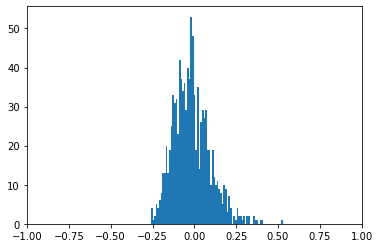

In [243]:
plt.hist(theta, bins=80);
plt.xlim(-1,1)